In [1]:
import numpy as np

we are creating a dataset with 1 feature, so it will have 2 parameters. also our dataset will have 100 samples

In [2]:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)
y = w1 + w0 * X + np.random.randn(n,)

In [3]:
print(X.shape)
print(y.shape)

(100,)
(100,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.20, random_state=42)
print(X_test.shape, y_test.shape, X_train.shape,y_train.shape)

(20,) (20,) (80,) (80,)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
X_train[:5]

array([9.90024676, 7.35151703, 6.3592974 , 2.72672533, 1.00679635])

In [7]:
y_train[:5]

array([41.52856614, 32.62508916, 27.67290551, 14.16761827,  7.21949731])

## lets visualise the tarining set

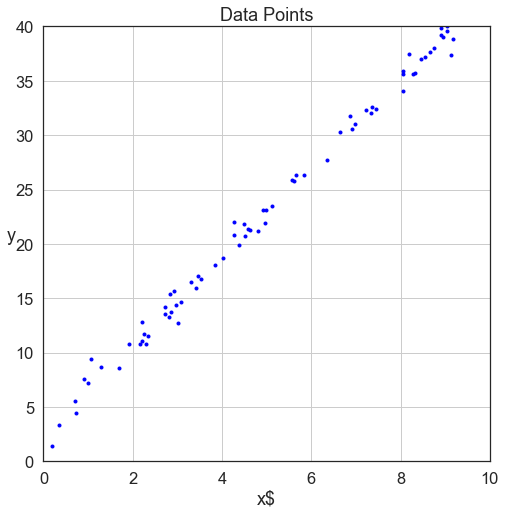

In [8]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("x$",fontsize = 18)
plt.ylabel("y",rotation = 0, fontsize = 18)
plt.axis([0,10,0,40])
plt.show()

In [9]:
np.column_stack((np.ones(X.shape[0]),X))

array([[1.        , 4.14620222],
       [1.        , 5.8474548 ],
       [1.        , 8.31918612],
       [1.        , 8.89992321],
       [1.        , 0.45147735],
       [1.        , 2.85446259],
       [1.        , 8.04866395],
       [1.        , 2.8131928 ],
       [1.        , 4.92246042],
       [1.        , 9.9860126 ],
       [1.        , 8.34192709],
       [1.        , 3.31412455],
       [1.        , 7.36999906],
       [1.        , 8.05528366],
       [1.        , 1.28780587],
       [1.        , 4.02444733],
       [1.        , 9.87778752],
       [1.        , 2.82373441],
       [1.        , 5.22936852],
       [1.        , 9.04112046],
       [1.        , 6.86724725],
       [1.        , 4.9965672 ],
       [1.        , 6.03100449],
       [1.        , 6.91834522],
       [1.        , 0.18571774],
       [1.        , 8.91429926],
       [1.        , 6.3592974 ],
       [1.        , 8.05340126],
       [1.        , 8.9460463 ],
       [1.        , 2.20367032],
       [1.

In [10]:
def add_dummy_feature(x):
    '''adds dummy feature to the dataset
     Args:
       x: Training dataset
     Returns:
          Training dataset with an addition of dummy features
     '''
    #np.ones(x.shape[0]) creates a vector of 1's having the same no.of rows as no.of samples in dataset
    return np.column_stack((np.ones(x.shape[0]),x))

In [11]:
add_dummy_feature(np.array([1,3,4]))#test case

array([[1., 1.],
       [1., 3.],
       [1., 4.]])

# C2- Model

Linear regression model uses linear combination of features to obtain output labels.In vectorized form, thi can be written as $y=Xw$

In [12]:
def predict(X,w):
    '''Predictioon of output label for a given input
        Args:
           X: Feature matrix of shape(n,m+1)
           w: weight vector of shape(m+1,n)
        Returns:
            y:Predicted label vector of shape(n,)
    '''
    #check that feature matrix and weight vector have compactible shapes
    assert X.shape[-1]==w.shape[0]

    y = X @ w #matrix vec multiplicaiton
    return y

In [13]:
#testing if predict works or not
A = np.array([[1,3,2,5],[1,9,4,7]]) #feature matrix
r = np.ones(4)
l = predict(A,r)
l

array([11., 21.])

Demonstrating this model on a synthetic dataset

In [14]:
#Preparing the dataset
[w0,w1]=[4,3]
n=100
x=10*np.random.randn(n,)
y = w0+w1*x+np.random.randn(n,)

In [15]:
#preprocessing: dummy feature and train test split
X_with_dummy = add_dummy_feature(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_dummy, y, test_size=0.2, random_state=42)

In [16]:
w = np.random.rand(2,)
w

array([0.33772797, 0.85193648])

In [17]:
y_hat = predict(X_train,w)

In [18]:
y_hat[:10]

array([-2.06486021, 15.48038828,  6.81843367,  0.07126363, -9.37997078,
       -7.83600073,  0.08417556, -4.15645353, -0.83085727, 12.14559501])

In [19]:
y[:10]

array([-29.75894778, -39.89520004,   1.9226318 ,   7.41756665,
       -24.95881154, -34.66510236,   5.07819028,  26.53240804,
        70.57320967,  -0.38847203])

In [20]:
def non_vectorized_predict(X,w):
    '''Prediction of output for a given input.
    Args:
        X: Feature matrix of shape (n, m+1)
        w: Weight vector of shape (m+1, n)
    Returns:
        y: Predicted label vector of shape (n, ).
    '''
    y = []
    for i in range(0,X.shape[0]):
        y_hat_i = 0
        for j in range(0,X.shape[1]):
            y_hat_i += X[i][j]*w[j]
        y.append(y_hat_i)
    return np.array(y)

# C3 - Loss

Loss fun is:
$$J(w) = \frac{1}{2}(Xw-y)^t(Xw-y)$$
 - X is a feature matrix with (m+1) features for n examples along rows
 - w is a weight vector containing (m+1) weights one for each feature
 - y is a label matrix containign labels for n examples in a vector of shape(n,)

In [21]:
def loss(features, labels, weights):
    e = predict(features, weights) - labels # e = predict(X,w)-y
    loss = (1/2) * (np.transpose(e) @ e)
    return loss

In [22]:
c = np.array([6,11])
loss(A,c,r)

62.5

# C4- Optimaization

Optimization is done with one of the two following methods:
- Normal Equaiton method, that sets the partial derivative of the loss function wrt weight vectors to 0 and solves the resulting equation to obtain the weight vector
- Gradient descent method, that iteratively adjusts the weight vectir based on the learning rate and the gradient of loss function at the current weight vector

## Normal equation
- we make use of `np.linalg.pinv` for calculating the psuedoinverse of the feature matrix

In [23]:
def normal_equation(X, y):
    '''Estimates parameters of the linear regression model with normal equation
    Args:
        X: feature matrix for given inputs.
        y: Actual label vector

    Returns:
        Weight vector
    '''
    return np.linalg.pinv(X) @ y

In [24]:
normal_equation(X_train,y_train)

array([4.20420783, 3.00274853])

## Gradient descent


### calculating the gradient
GD is implemented as follows

- Randomly initialize  to 0.
- Iterate until convergence:
    - Calculate partial derivative of loss w.r.t weight vector
    - Calculate new values of weights
    - Update weights to new values simultaneously

We use number of epochs as a convergence criteria in this implementation
*partial derivative of loss function is* $$ \frac{\partial }{\partial w} J(w) = X^T(Xw-y)$$
The multipication of transpose of feature matrix with the difference of predicted and actual label vectors

In [25]:
def calculate_gradient(X,y,w): #(feature matrix,label vector, weights)
    return np.transpose(X) @ (predict(X,w)-y)

g=calculate_gradient(A,c,r)
g

array([ 15., 105.,  50.,  95.])

### Weight updates

In [26]:
def update_weights(w, grad, lr):

    '''updates the wieights based on the gradient of the loss function.
    weight updates are carried out with the following formula:
    w_new := w_old - lr * grad

    Args:
      1. w : wight vector
      2. grad: gradient of loss wrt w
      3. lr: learning rate

    Returns:
      Updated Weight Vector
    '''
    return (w-(lr*grad))

In [27]:
lr = 0.001
update_weights(r,g,lr)

array([0.985, 0.895, 0.95 , 0.905])

In [11]:
def add_dummy_feature(x):
    '''adds dummy feature to the dataset
     Args:
       x: Training dataset
     Returns:
          Training dataset with an addition of dummy features
     '''
    #np.ones(x.shape[0]) creates a vector of 1's having the same no.of rows as no.of samples in dataset
    return np.column_stack((np.ones(x.shape[0]),x))

In [12]:
add_dummy_feature(np.array([1,3,4]))#test case

array([[1., 1.],
       [1., 3.],
       [1., 4.]])

# C2- Model

Linear regression model uses linear combination of features to obtain output labels.In vectorized form, thi can be written as $y=Xw$

In [13]:
def predict(X,w):
    '''Predictioon of output label for a given input
        Args:
           X: Feature matrix of shape(n,m+1)
           w: weight vector of shape(m+1,n)
        Returns:
            y:Predicted label vector of shape(n,)
    '''
    #check that feature matrix and weight vector have compactible shapes
    assert X.shape[-1]==w.shape[0]

    y = X @ w #matrix vec multiplicaiton
    return y

In [14]:
#testing if predict works or not
A = np.array([[1,3,2,5],[1,9,4,7]]) #feature matrix
r = np.ones(4)
l = predict(A,r)
l

array([11., 21.])

Demonstrating this model on a synthetic dataset

In [15]:
#Preparing the dataset
[w0,w1]=[4,3]
n=100
x=10*np.random.randn(n,)
y = w0+w1*x+np.random.randn(n,)

In [16]:
#preprocessing: dummy feature and train test split
X_with_dummy = add_dummy_feature(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_dummy, y, test_size=0.2, random_state=42)

In [17]:
w = np.random.rand(2,)
w

array([0.77252048, 0.64183133])

In [18]:
y_hat = predict(X_train,w)

In [19]:
y_hat[:10]

array([ 3.86823075e+00, -2.63774787e+00, -7.80459476e+00,  5.32795491e+00,
        4.19767480e-01,  3.97755397e-04,  3.39414489e+00, -9.98914293e+00,
        9.23834465e-01,  1.20431740e-01])

In [20]:
y[:10]

array([-43.75531839,   7.82961186, -53.52551733,   9.63159586,
        30.89075702,  21.5377427 ,  34.81749116,  49.99446831,
        -3.28115676,   5.2115958 ])

In [21]:
def non_vectorized_predict(X,w):
    '''Prediction of output for a given input.
    Args:
        X: Feature matrix of shape (n, m+1)
        w: Weight vector of shape (m+1, n)
    Returns:
        y: Predicted label vector of shape (n, ).
    '''
    y = []
    for i in range(0,X.shape[0]):
        y_hat_i = 0
        for j in range(0,X.shape[1]):
            y_hat_i += X[i][j]*w[j]
        y.append(y_hat_i)
    return np.array(y)

# C3 - Loss

Loss fun is:
$$J(w) = \frac{1}{2}(Xw-y)^t(Xw-y)$$
 - X is a feature matrix with (m+1) features for n examples along rows
 - w is a weight vector containing (m+1) weights one for each feature
 - y is a label matrix containign labels for n examples in a vector of shape(n,)

In [22]:
def loss(features, labels, weights):
    e = predict(features, weights) - labels # e = predict(X,w)-y
    loss = (1/2) * (np.transpose(e) @ e)
    return loss

In [23]:
c = np.array([6,11])
loss(A,c,r)

62.5

# C4- Optimaization

Optimization is done with one of the two following methods:
- Normal Equaiton method, that sets the partial derivative of the loss function wrt weight vectors to 0 and solves the resulting equation to obtain the weight vector
- Gradient descent method, that iteratively adjusts the weight vectir based on the learning rate and the gradient of loss function at the current weight vector

## Normal equation
- we make use of `np.linalg.pinv` for calculating the psuedoinverse of the feature matrix

In [24]:
def normal_equation(X, y):
    '''Estimates parameters of the linear regression model with normal equation
    Args:
        X: feature matrix for given inputs.
        y: Actual label vector

    Returns:
        Weight vector
    '''
    return np.linalg.pinv(X) @ y

In [25]:
normal_equation(X_train,y_train)

array([3.85906791, 2.97850104])

## Gradient descent


### calculating the gradient
GD is implemented as follows

- Randomly initialize  to 0.
- Iterate until convergence:
    - Calculate partial derivative of loss w.r.t weight vector
    - Calculate new values of weights
    - Update weights to new values simultaneously

We use number of epochs as a convergence criteria in this implementation
*partial derivative of loss function is* $$ \frac{\partial }{\partial w} J(w) = X^T(Xw-y)$$
The multipication of transpose of feature matrix with the difference of predicted and actual label vectors

In [31]:
def calculate_gradient(X,y,w): #(feature matrix,label vector, weights)
    return np.transpose(X) @ (predict(X,w)-y)

g=calculate_gradient(A,c,r)
g

array([ 15., 105.,  50.,  95.])

### Weight updates

In [32]:
def update_weights(w, grad, lr):

    '''updates the wieights based on the gradient of the loss function.
    weight updates are carried out with the following formula:
    w_new := w_old - lr * grad

    Args:
      1. w : wight vector
      2. grad: gradient of loss wrt w
      3. lr: learning rate

    Returns:
      Updated Weight Vector
    '''
    return (w-(lr*grad))

In [34]:
lr = 0.001
update_weights(r,g,lr)

array([0.985, 0.895, 0.95 , 0.905])